In [136]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [137]:
df= pd.read_csv('C:\\Users\\admin\\Downloads\\NTDTY.csv')

In [138]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-17,20.700001,20.700001,20.700001,20.700001,20.700001,0
1,2021-09-20,20.700001,20.700001,20.700001,20.700001,20.700001,0
2,2021-09-21,20.700001,20.700001,20.700001,20.700001,20.700001,0
3,2021-09-22,20.700001,20.700001,20.700001,20.700001,20.700001,0
4,2021-09-23,20.700001,20.700001,20.700001,20.700001,20.700001,0
...,...,...,...,...,...,...,...
247,2022-09-12,14.660000,14.660000,13.820000,14.270000,14.270000,2700
248,2022-09-13,14.240000,14.290000,13.420000,13.420000,13.420000,19700
249,2022-09-14,13.280000,14.130000,13.280000,14.130000,14.130000,31700
250,2022-09-15,13.780000,13.780000,13.780000,13.780000,13.780000,1200


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [140]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,17.929266,18.018809,17.861706,17.924960,17.924960,4356.083333
std,2.754764,2.662070,2.806233,2.751755,2.751755,16322.003219
min,13.010000,13.580000,12.900000,12.900000,12.900000,0.000000
25%,15.200000,15.277500,15.175000,15.247500,15.247500,0.000000
50%,18.520000,18.555000,18.520000,18.520000,18.520000,200.000000
75%,20.150000,20.150000,20.150000,20.150000,20.150000,1200.000000
max,22.299999,22.299999,22.299999,22.299999,22.299999,168100.000000


In [141]:
df.columns 


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [142]:
df.shape

(252, 7)

In [143]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [144]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [145]:
df    = df.loc[:,["Open"]].values
train = df[:len(df)-50] 
test = df[len(train):] 
train = train.reshape(train.shape[0],1)

In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
train_scaled = scaler.fit_transform(train) # applying to Scaler to train


In [147]:
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [163]:
from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout 
regressor = Sequential()
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
5/5 [==============================] - 2s 28ms/step - loss: 0.5910 - accuracy: 0.0066
Epoch 2/200
5/5 [==============================] - 0s 24ms/step - loss: 0.5367 - accuracy: 0.0132
Epoch 3/200
5/5 [==============================] - 0s 24ms/step - loss: 0.4567 - accuracy: 0.0066
Epoch 4/200
5/5 [==============================] - 0s 24ms/step - loss: 0.4287 - accuracy: 0.0132
Epoch 5/200
5/5 [==============================] - 0s 24ms/step - loss: 0.4904 - accuracy: 0.0132
Epoch 6/200
5/5 [==============================] - 0s 24ms/step - loss: 0.3830 - accuracy: 0.0066
Epoch 7/200
5/5 [==============================] - 0s 24ms/step - loss: 0.3284 - accuracy: 0.0066
Epoch 8/200
5/5 [==============================] - 0s 24ms/step - loss: 0.4083 - accuracy: 0.0132
Epoch 9/200
5/5 [==============================] - 0s 25ms/step - loss: 0.2650 - accuracy: 0.0132
Epoch 10/200
5/5 [==============================] - 0s 24ms/step - loss: 0.2566 - accuracy: 0.0000e+00
Epoch 11/200
5/

5/5 [==============================] - 0s 25ms/step - loss: 0.0632 - accuracy: 0.0132
Epoch 84/200
5/5 [==============================] - 0s 24ms/step - loss: 0.0687 - accuracy: 0.0132
Epoch 85/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0785 - accuracy: 0.0066
Epoch 86/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0677 - accuracy: 0.0132
Epoch 87/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0619 - accuracy: 0.0132
Epoch 88/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0558 - accuracy: 0.0132
Epoch 89/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0594 - accuracy: 0.0132
Epoch 90/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0562 - accuracy: 0.0132
Epoch 91/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0651 - accuracy: 0.0132
Epoch 92/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0549 - accuracy: 0.0132
Epoch 93/200
5/5 [=====

5/5 [==============================] - 0s 25ms/step - loss: 0.0259 - accuracy: 0.0132
Epoch 166/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0220 - accuracy: 0.0132
Epoch 167/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0253 - accuracy: 0.0132
Epoch 168/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0242 - accuracy: 0.0132
Epoch 169/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0243 - accuracy: 0.0132
Epoch 170/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0267 - accuracy: 0.0132
Epoch 171/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0215 - accuracy: 0.0132
Epoch 172/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0212 - accuracy: 0.0132
Epoch 173/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0181 - accuracy: 0.0132
Epoch 174/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0209 - accuracy: 0.0132
Epoch 175/200


In [164]:
inputs = df[len(df) - len(test) - timesteps:]
inputs = scaler.transform(inputs)

In [165]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0])  
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [166]:
predicted = regressor.predict(X_test)
predicted = scaler.inverse_transform(predicted)

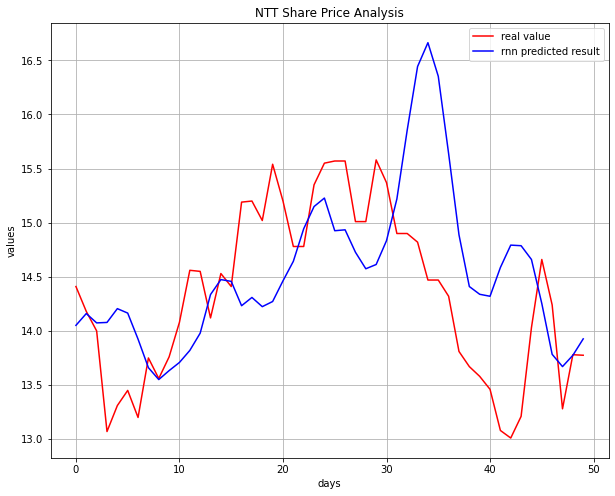

In [167]:
plt.figure(figsize=(10,8))
plt.plot(test,color="red",label="real value")
plt.plot(predicted,color="blue",label="rnn predicted result")
plt.title("NTT Share Price Analysis")
plt.legend()
plt.xlabel("days")
plt.ylabel("values")
plt.grid(True)
plt.show()